In [146]:
import pandas as pd
import pprint
import matplotlib.pyplot as plt 
import seaborn as sns
import numpy as np
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)

import warnings
warnings.filterwarnings('ignore')

In [147]:
model_info = [
'Aord_size',
 'Themes_size',
 'num_nodes',
 'num_pnode',
 'num_onode',
 'num_edge',
 'max_given_themes_num',
 'num_propvar',
 'max_given_logics_num',
]

constraints_names = [

    'tr', 
    'nnp',
    'nsa', 
    'kos',
    'nss',
    
    'aass',
    'i',
    'vi',
    'bat',
    'pr',
    'mat',
    'manss',
    'ss',
    'esr',
    'ensr',
    'eos',
    'das',
    'nwci',
    'faD',
    'faW',
]

# Compare the computation time for each PC.

In [219]:
df1 = pd.read_csv("./time_data_subPC.csv")
df2 = pd.read_csv("./time_data_mainPC.csv")

print(df1.shape)
print(df2.shape)

df1 = df1[df1["num_propvar"] < 3]
df2 = df2[df2["num_propvar"] < 3]



(235556, 49)
(316466, 49)
552022


In [149]:
# 二つのPCでの計算時間の比較

df1.describe()

,Aord_size,Themes_size,num_nodes,num_pnode,num_onode,num_edge,max_given_themes_num,num_propvar,max_given_logics_num,tr_time,nnp_time,nsa_time,kos_time,nss_time,aass_time,i_time,vi_time,bat_time,pr_time,mat_time,manss_time,ss_time,esr_time,ensr_time,eos_time,das_time,nwci_time,faD_time,faW_time
count,1.57e+05,1.57e+05,1.57e+05,1.57e+05,1.57e+05,1.57e+05,1.57e+05,1.57e+05,1.57e+05,1.57e+05,1.57e+05,1.57e+05,1.57e+05,1.57e+05,1.57e+05,1.57e+05,1.57e+05,1.57e+05,1.57e+05,1.57e+05,1.57e+05,1.57e+05,1.57e+05,1.57e+05,1.57e+05,1.57e+05,1.57e+05,1.57e+05,1.57e+05
mean,2.75e+00,2.50e+00,4.91e+00,2.16e+00,2.75e+00,1.28e+01,1.81e+00,1.50e+00,2.41e+00,7.28e-06,5.04e-06,2.13e-06,2.40e-06,4.05e-06,4.39e-04,3.74e-04,1.50e-06,6.52e-04,1.24e-03,6.82e-04,1.11e-03,1.45e-03,8.90e-05,8.31e-05,7.51e-05,4.61e-04,1.23e-03,1.46e-01,1.02e-01
std,2.48e+00,1.12e+00,2.86e+00,1.84e+00,2.48e+00,1.64e+01,9.02e-01,5.00e-01,1.07e+00,7.78e-06,2.62e-06,7.98e-07,1.41e-06,5.44e-06,1.31e-03,5.46e-04,6.06e-07,8.31e-04,2.24e-03,1.07e-03,2.06e-03,2.27e-03,1.27e-04,1.32e-04,1.29e-04,8.42e-04,4.00e-03,9.20e-01,4.54e-01
min,0.00e+00,1.00e+00,1.00e+00,0.00e+00,0.00e+00,0.00e+00,1.00e+00,1.00e+00,0.00e+00,7.15e-07,7.15e-07,7.15e-07,0.00e+00,0.00e+00,0.00e+00,1.67e-06,0.00e+00,9.54e-07,6.91e-06,3.10e-06,3.81e-06,1.67e-06,4.77e-06,4.77e-06,4.77e-06,7.15e-07,0.00e+00,7.10e-05,1.91e-06
25%,1.00e+00,1.00e+00,2.00e+00,1.00e+00,1.00e+00,1.00e+00,1.00e+00,1.00e+00,1.00e+00,3.81e-06,3.10e-06,1.91e-06,9.54e-07,1.19e-06,5.25e-06,4.29e-06,9.54e-07,1.18e-04,7.39e-05,3.10e-05,2.91e-05,1.32e-04,1.31e-05,1.19e-05,1.22e-05,4.01e-05,3.81e-06,3.18e-04,9.06e-06
50%,2.00e+00,2.00e+00,5.00e+00,2.00e+00,2.00e+00,6.00e+00,2.00e+00,2.00e+00,2.00e+00,5.01e-06,4.77e-06,2.15e-06,2.15e-06,2.15e-06,5.91e-05,1.46e-04,1.19e-06,4.13e-04,4.08e-04,2.51e-04,2.87e-04,4.79e-04,3.19e-05,2.79e-05,2.60e-05,1.30e-04,5.72e-05,1.99e-03,1.63e-03
75%,4.00e+00,4.00e+00,7.00e+00,3.00e+00,4.00e+00,1.80e+01,2.00e+00,2.00e+00,3.00e+00,7.15e-06,6.20e-06,2.15e-06,3.10e-06,4.29e-06,2.27e-04,5.49e-04,1.91e-06,9.12e-04,1.28e-03,8.12e-04,1.07e-03,1.95e-03,9.80e-05,8.61e-05,7.39e-05,4.24e-04,7.43e-04,1.83e-02,1.71e-02
max,1.00e+01,4.00e+00,1.00e+01,8.00e+00,1.00e+01,9.90e+01,4.00e+00,2.00e+00,4.00e+00,2.74e-04,4.54e-04,1.57e-04,1.20e-04,1.94e-04,4.05e-02,2.86e-02,4.91e-05,5.74e-02,1.27e-01,5.09e-02,9.31e-02,2.13e-01,5.14e-03,1.66e-02,7.80e-03,3.05e-02,1.75e-01,6.35e+01,1.97e+01


In [150]:
df2.describe()

,Aord_size,Themes_size,num_nodes,num_pnode,num_onode,num_edge,max_given_themes_num,num_propvar,max_given_logics_num,tr_time,nnp_time,nsa_time,kos_time,nss_time,aass_time,i_time,vi_time,bat_time,pr_time,mat_time,manss_time,ss_time,esr_time,ensr_time,eos_time,das_time,nwci_time,faD_time,faW_time
count,3.16e+05,3.16e+05,3.16e+05,3.16e+05,3.16e+05,3.16e+05,3.16e+05,3.16e+05,3.16e+05,3.16e+05,3.16e+05,3.16e+05,3.16e+05,3.16e+05,3.16e+05,3.16e+05,3.16e+05,3.16e+05,3.16e+05,3.16e+05,3.16e+05,3.16e+05,3.16e+05,3.16e+05,3.16e+05,3.16e+05,3.16e+05,3.16e+05,3.16e+05
mean,2.75e+00,2.50e+00,4.90e+00,2.15e+00,2.75e+00,1.28e+01,1.81e+00,1.50e+00,2.41e+00,8.18e-06,5.24e-06,2.31e-06,2.40e-06,4.22e-06,4.23e-04,3.61e-04,1.46e-06,6.35e-04,1.21e-03,6.56e-04,1.08e-03,1.42e-03,8.86e-05,8.25e-05,7.52e-05,4.43e-04,1.18e-03,1.36e-01,9.80e-02
std,2.49e+00,1.12e+00,2.86e+00,1.84e+00,2.49e+00,1.64e+01,9.01e-01,5.00e-01,1.07e+00,8.33e-06,2.75e-06,1.25e-06,1.53e-06,5.60e-06,1.25e-03,5.21e-04,7.02e-07,7.90e-04,2.18e-03,1.01e-03,1.99e-03,2.12e-03,1.25e-04,1.21e-04,1.27e-04,8.09e-04,3.83e-03,8.38e-01,4.44e-01
min,0.00e+00,1.00e+00,1.00e+00,0.00e+00,0.00e+00,0.00e+00,1.00e+00,1.00e+00,0.00e+00,7.15e-07,7.15e-07,7.15e-07,0.00e+00,0.00e+00,0.00e+00,1.67e-06,0.00e+00,7.15e-07,6.91e-06,3.81e-06,3.81e-06,1.67e-06,4.77e-06,4.77e-06,4.05e-06,7.15e-07,7.15e-07,7.18e-05,2.62e-06
25%,1.00e+00,1.00e+00,2.00e+00,1.00e+00,1.00e+00,1.00e+00,1.00e+00,1.00e+00,1.00e+00,4.05e-06,3.10e-06,1.91e-06,9.54e-07,1.19e-06,5.96e-06,5.01e-06,9.54e-07,1.17e-04,7.51e-05,3.19e-05,2.91e-05,1.32e-04,1.31e-05,1.19e-05,1.22e-05,3.98e-05,3.81e-06,3.17e-04,1.00e-05
50%,2.00e+00,2.00e+00,5.00e+00,2.00e+00,2.00e+00,6.00e+00,2.00e+00,1.00e+00,2.00e+00,5.96e-06,4.77e-06,2.15e-06,2.15e-06,2.15e-06,5.89e-05,1.47e-04,1.19e-06,4.14e-04,4.06e-04,2.50e-04,2.83e-04,4.76e-04,3.19e-05,2.79e-05,2.60e-05,1.23e-04,5.63e-05,1.91e-03,1.56e-03
75%,4.00e+00,3.00e+00,7.00e+00,3.00e+00,4.00e+00,1.80e+01,2.00e+00,2.00e+00,3.00e+00,9.06e-06,6.91e-06,2.86e-06,3.10e-06,4.77e-06,2.19e-04,5.05e-04,1.91e-06,8.95e-04,1.26e-03,7.70e-04,1.04e-03,1.91e-03,9.80e-05,8.39e-05,7.39e-05,4.03e-04,6.90e-04,1.69e-02,1.60e-02
max,1.00e+01,4.00e+00,1.00e+01,8.00e+00,1.00e+01,9.90e+01,4.00e+00,2.00e+00,4.00e+00,2.88e-04,1.79e-04,5.27e-04,1.73e-04,1.11e-04,6.82e-02,4.26e-02,8.11e-05,4.47e-02,1.44e-01,3.37e-02,1.22e-01,1.12e-01,3.25e-03,4.04e-03,6.61e-03,6.61e-02,2.26e-01,5.89e+01,3.09e+01


In [151]:
(df1.describe() - df2.describe()) / (df2.describe() + 0.0000001)

,Aord_size,Themes_size,num_nodes,num_pnode,num_onode,num_edge,max_given_themes_num,num_propvar,max_given_logics_num,tr_time,nnp_time,nsa_time,kos_time,nss_time,aass_time,i_time,vi_time,bat_time,pr_time,mat_time,manss_time,ss_time,esr_time,ensr_time,eos_time,das_time,nwci_time,faD_time,faW_time
count,-5.03e-01,-5.03e-01,-5.03e-01,-5.03e-01,-5.03e-01,-5.03e-01,-5.03e-01,-5.03e-01,-5.03e-01,-5.03e-01,-5.03e-01,-5.03e-01,-5.03e-01,-5.03e-01,-5.03e-01,-5.03e-01,-5.03e-01,-5.03e-01,-5.03e-01,-5.03e-01,-5.03e-01,-5.03e-01,-5.03e-01,-5.03e-01,-5.03e-01,-5.03e-01,-5.03e-01,-5.03e-01,-5.03e-01
mean,-7.60e-04,1.19e-03,1.37e-03,4.08e-03,-7.60e-04,1.57e-03,3.22e-04,4.52e-04,-1.98e-03,-1.09e-01,-3.73e-02,-7.30e-02,-1.51e-03,-4.00e-02,3.90e-02,3.65e-02,2.35e-02,2.76e-02,2.68e-02,4.05e-02,2.91e-02,2.63e-02,4.94e-03,7.40e-03,-1.68e-03,4.02e-02,3.82e-02,7.31e-02,3.64e-02
std,-3.63e-03,1.29e-03,-1.12e-03,6.60e-04,-3.63e-03,-7.16e-04,9.35e-04,7.08e-07,8.35e-04,-6.43e-02,-4.73e-02,-3.37e-01,-7.58e-02,-2.82e-02,4.08e-02,4.72e-02,-1.20e-01,5.25e-02,2.74e-02,6.51e-02,3.67e-02,7.11e-02,1.72e-02,8.89e-02,1.71e-02,4.11e-02,4.34e-02,9.85e-02,2.31e-02
min,0.00e+00,0.00e+00,0.00e+00,0.00e+00,0.00e+00,0.00e+00,0.00e+00,0.00e+00,0.00e+00,0.00e+00,0.00e+00,0.00e+00,0.00e+00,0.00e+00,0.00e+00,0.00e+00,0.00e+00,2.92e-01,0.00e+00,-1.83e-01,0.00e+00,0.00e+00,0.00e+00,0.00e+00,1.72e-01,0.00e+00,-8.77e-01,-9.95e-03,-2.63e-01
25%,0.00e+00,0.00e+00,0.00e+00,0.00e+00,0.00e+00,0.00e+00,0.00e+00,0.00e+00,0.00e+00,-5.74e-02,0.00e+00,0.00e+00,0.00e+00,0.00e+00,-1.18e-01,-1.40e-01,0.00e+00,8.14e-03,-1.59e-02,-2.98e-02,0.00e+00,0.00e+00,0.00e+00,0.00e+00,0.00e+00,5.97e-03,0.00e+00,3.76e-03,-9.43e-02
50%,0.00e+00,0.00e+00,0.00e+00,0.00e+00,0.00e+00,0.00e+00,0.00e+00,1.00e+00,0.00e+00,-1.57e-01,0.00e+00,0.00e+00,0.00e+00,0.00e+00,4.04e-03,-8.10e-03,0.00e+00,-2.30e-03,5.28e-03,3.82e-03,1.26e-02,6.51e-03,0.00e+00,0.00e+00,0.00e+00,5.81e-02,1.69e-02,3.80e-02,4.30e-02
75%,0.00e+00,3.33e-01,0.00e+00,0.00e+00,0.00e+00,0.00e+00,0.00e+00,0.00e+00,0.00e+00,-2.08e-01,-1.02e-01,-2.42e-01,0.00e+00,-9.79e-02,3.70e-02,8.78e-02,0.00e+00,1.86e-02,2.17e-02,5.45e-02,3.07e-02,2.11e-02,0.00e+00,2.55e-02,0.00e+00,5.26e-02,7.67e-02,8.58e-02,6.94e-02
max,0.00e+00,0.00e+00,0.00e+00,0.00e+00,0.00e+00,0.00e+00,0.00e+00,0.00e+00,0.00e+00,-4.88e-02,1.54e+00,-7.02e-01,-3.05e-01,7.42e-01,-4.06e-01,-3.29e-01,-3.94e-01,2.84e-01,-1.15e-01,5.10e-01,-2.38e-01,9.13e-01,5.83e-01,3.12e+00,1.80e-01,-5.38e-01,-2.24e-01,7.72e-02,-3.62e-01


# Read and roughly check the data.

In [152]:
df = pd.read_csv("./time_data_merged.csv")

In [153]:
# bool -> int

for name in constraints_names:
    df[f"{name}_TF"] = df[f"{name}_TF"] * 1


In [154]:
df.shape # データ件数,列数

(552022, 49)

In [155]:
df.describe()

,Aord_size,Themes_size,num_nodes,num_pnode,num_onode,num_edge,max_given_themes_num,num_propvar,max_given_logics_num,tr_time,tr_TF,nnp_time,nnp_TF,nsa_time,nsa_TF,kos_time,kos_TF,nss_time,nss_TF,aass_time,aass_TF,i_time,i_TF,vi_time,vi_TF,bat_time,bat_TF,pr_time,pr_TF,mat_time,mat_TF,manss_time,manss_TF,ss_time,ss_TF,esr_time,esr_TF,ensr_time,ensr_TF,eos_time,eos_TF,das_time,das_TF,nwci_time,nwci_TF,faD_time,faD_TF,faW_time,faW_TF
count,5.52e+05,5.52e+05,5.52e+05,5.52e+05,5.52e+05,5.52e+05,5.52e+05,5.52e+05,5.52e+05,5.52e+05,5.52e+05,5.52e+05,5.52e+05,5.52e+05,5.52e+05,5.52e+05,5.52e+05,5.52e+05,5.52e+05,5.52e+05,5.52e+05,5.52e+05,5.52e+05,5.52e+05,5.52e+05,5.52e+05,5.52e+05,5.52e+05,5.52e+05,5.52e+05,5.52e+05,5.52e+05,5.52e+05,5.52e+05,5.52e+05,5.52e+05,5.52e+05,5.52e+05,5.52e+05,5.52e+05,5.52e+05,5.52e+05,5.52e+05,5.52e+05,5.52e+05,5.52e+05,5.52e+05,5.52e+05,5.52e+05
mean,2.75e+00,2.50e+00,4.90e+00,2.16e+00,2.75e+00,1.28e+01,1.81e+00,1.71e+00,2.42e+00,7.91e-06,4.70e-01,5.21e-06,6.61e-01,2.25e-06,3.74e-01,2.41e-06,6.96e-01,4.17e-06,2.51e-01,6.84e-04,2.05e-01,6.69e-04,1.20e-02,1.48e-06,6.80e-02,1.07e-03,3.70e-02,2.38e-03,1.78e-01,1.27e-03,1.12e-01,2.12e-03,2.19e-01,3.86e-03,1.91e-01,1.01e-04,7.86e-01,9.55e-05,7.81e-01,9.70e-05,6.59e-01,9.16e-04,2.45e-01,2.26e-03,2.92e-01,1.44e+00,6.29e-01,6.01e-01,6.36e-01
std,2.49e+00,1.12e+00,2.86e+00,1.84e+00,2.49e+00,1.64e+01,9.01e-01,6.99e-01,1.08e+00,8.15e-06,4.99e-01,2.70e-06,4.73e-01,1.08e-06,4.84e-01,1.49e-06,4.60e-01,5.55e-06,4.34e-01,2.49e-03,4.04e-01,1.29e-03,1.09e-01,6.69e-07,2.52e-01,1.56e-03,1.89e-01,5.94e-03,3.83e-01,2.70e-03,3.15e-01,5.32e-03,4.14e-01,8.96e-03,3.93e-01,1.49e-04,4.10e-01,1.52e-04,4.14e-01,1.82e-04,4.74e-01,2.43e-03,4.30e-01,8.83e-03,4.55e-01,1.78e+01,4.83e-01,5.83e+00,4.81e-01
min,0.00e+00,1.00e+00,1.00e+00,0.00e+00,0.00e+00,0.00e+00,1.00e+00,1.00e+00,0.00e+00,7.15e-07,0.00e+00,7.15e-07,0.00e+00,7.15e-07,0.00e+00,0.00e+00,0.00e+00,0.00e+00,0.00e+00,0.00e+00,0.00e+00,1.67e-06,0.00e+00,0.00e+00,0.00e+00,7.15e-07,0.00e+00,6.91e-06,0.00e+00,3.10e-06,0.00e+00,2.62e-06,0.00e+00,1.67e-06,0.00e+00,4.77e-06,0.00e+00,4.77e-06,0.00e+00,4.05e-06,0.00e+00,7.15e-07,0.00e+00,0.00e+00,0.00e+00,7.10e-05,0.00e+00,1.91e-06,0.00e+00
25%,1.00e+00,1.00e+00,2.00e+00,1.00e+00,1.00e+00,1.00e+00,1.00e+00,1.00e+00,1.00e+00,4.05e-06,0.00e+00,3.10e-06,0.00e+00,1.91e-06,0.00e+00,9.54e-07,0.00e+00,1.19e-06,0.00e+00,5.96e-06,0.00e+00,4.77e-06,0.00e+00,9.54e-07,0.00e+00,1.27e-04,0.00e+00,8.11e-05,0.00e+00,3.29e-05,0.00e+00,2.93e-05,0.00e+00,1.39e-04,0.00e+00,1.31e-05,1.00e+00,1.22e-05,1.00e+00,1.31e-05,0.00e+00,4.22e-05,0.00e+00,3.81e-06,0.00e+00,3.22e-04,0.00e+00,9.78e-06,0.00e+00
50%,2.00e+00,2.00e+00,5.00e+00,2.00e+00,2.00e+00,6.00e+00,2.00e+00,2.00e+00,2.00e+00,5.25e-06,0.00e+00,4.77e-06,1.00e+00,2.15e-06,0.00e+00,2.15e-06,1.00e+00,2.15e-06,0.00e+00,6.29e-05,0.00e+00,1.57e-04,0.00e+00,1.19e-06,0.00e+00,5.25e-04,0.00e+00,4.70e-04,0.00e+00,3.18e-04,0.00e+00,3.46e-04,0.00e+00,7.00e-04,0.00e+00,3.48e-05,1.00e+00,3.10e-05,1.00e+00,2.91e-05,1.00e+00,1.38e-04,0.00e+00,6.20e-05,0.00e+00,2.30e-03,1.00e+00,1.92e-03,1.00e+00
75%,4.00e+00,3.00e+00,7.00e+00,3.00e+00,4.00e+00,1.80e+01,2.00e+00,2.00e+00,3.00e+00,8.82e-06,1.00e+00,6.91e-06,1.00e+00,2.86e-06,1.00e+00,3.10e-06,1.00e+00,4.77e-06,1.00e+00,2.58e-04,0.00e+00,6.93e-04,0.00e+00,1.91e-06,0.00e+00,1.31e-03,0.00e+00,2.00e-03,0.00e+00,1.30e-03,0.00e+00,1.70e-03,0.00e+00,3.32e-03,0.00e+00,1.08e-04,1.00e+00,9.70e-05,1.00e+00,8.87e-05,1.00e+00,5.88e-04,0.00e+00,9.32e-04,1.00e+00,3.99e-02,1.00e+00,3.61e-02,1.00e+00
max,1.00e+01,4.00e+00,1.00e+01,8.00e+00,1.00e+01,9.90e+01,4.00e+00,3.00e+00,4.00e+00,2.88e-04,1.00e+00,4.54e-04,1.00e+00,5.27e-04,1.00e+00,1.73e-04,1.00e+00,1.94e-04,1.00e+00,1.40e-01,1.00e+00,4.26e-02,1.00e+00,8.11e-05,1.00e+00,5.74e-02,1.00e+00,3.65e-01,1.00e+00,6.95e-02,1.00e+00,1.22e-01,1.00e+00,2.13e-01,1.00e+00,5.14e-03,1.00e+00,1.66e-02,1.00e+00,7.80e-03,1.00e+00,7.75e-02,1.00e+00,7.98e-01,1.00e+00,2.25e+03,1.00e+00,9.96e+02,1.00e+00


In [156]:
pprint.pprint([col for col in df.columns]) #　列一覧

['Aord_size',
 'Themes_size',
 'num_nodes',
 'num_pnode',
 'num_onode',
 'num_edge',
 'max_given_themes_num',
 'num_propvar',
 'max_given_logics_num',
 'tr_time',
 'tr_TF',
 'nnp_time',
 'nnp_TF',
 'nsa_time',
 'nsa_TF',
 'kos_time',
 'kos_TF',
 'nss_time',
 'nss_TF',
 'aass_time',
 'aass_TF',
 'i_time',
 'i_TF',
 'vi_time',
 'vi_TF',
 'bat_time',
 'bat_TF',
 'pr_time',
 'pr_TF',
 'mat_time',
 'mat_TF',
 'manss_time',
 'manss_TF',
 'ss_time',
 'ss_TF',
 'esr_time',
 'esr_TF',
 'ensr_time',
 'ensr_TF',
 'eos_time',
 'eos_TF',
 'das_time',
 'das_TF',
 'nwci_time',
 'nwci_TF',
 'faD_time',
 'faD_TF',
 'faW_time',
 'faW_TF']


<AxesSubplot:xlabel='num_propvar'>

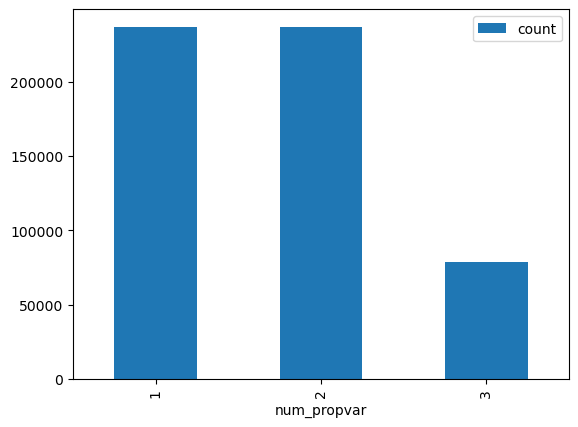

In [157]:
df.groupby("num_propvar").count()[["Aord_size"]].rename(columns={"Aord_size" : "count"}).plot.bar()

<AxesSubplot:xlabel='num_nodes'>

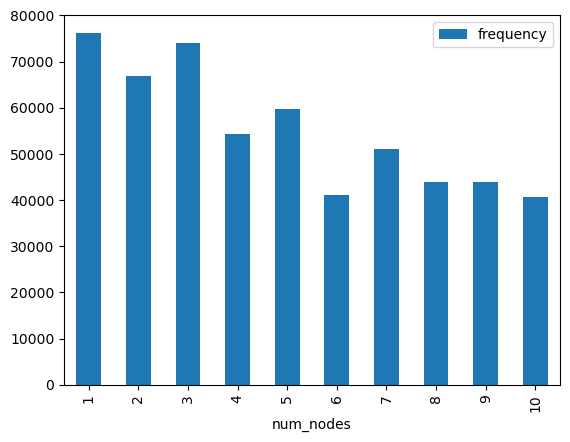

In [158]:
df.groupby("num_nodes").count()[["Aord_size"]].rename(columns={"Aord_size" : "frequency"}).plot.bar()

<AxesSubplot:xlabel='num_edge'>

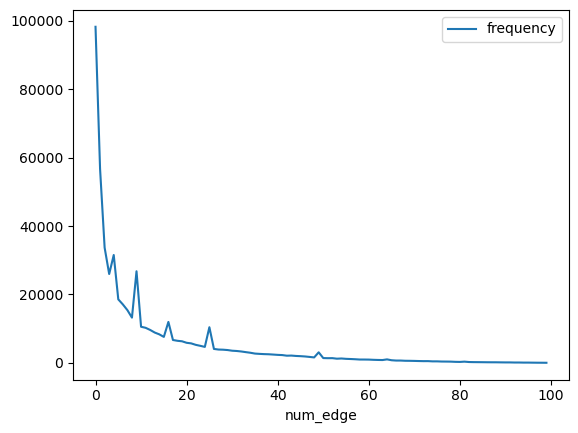

In [159]:
df.groupby("num_edge").count()[["Aord_size"]].rename(columns={"Aord_size" : "frequency"}).plot()

<AxesSubplot:xlabel='Themes_size'>

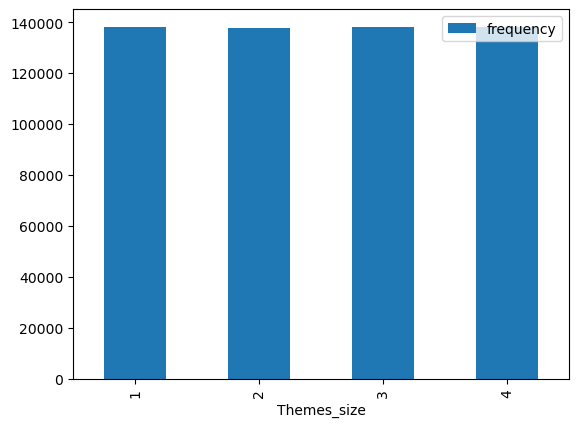

In [160]:
df.groupby("Themes_size").count()[["Aord_size"]].rename(columns={"Aord_size" : "frequency"}).plot.bar()

<AxesSubplot:xlabel='max_given_themes_num'>

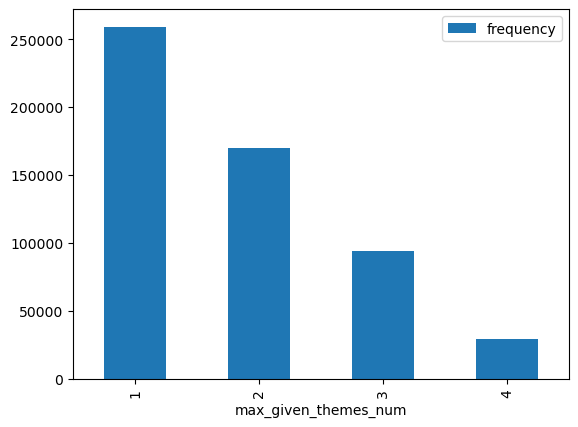

In [161]:
df.groupby("max_given_themes_num").count()[["Aord_size"]].rename(columns={"Aord_size" : "frequency"}).plot.bar()

<AxesSubplot:xlabel='max_given_logics_num'>

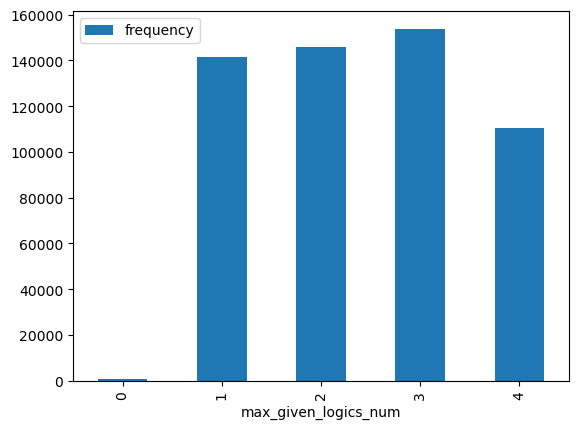

In [162]:
df.groupby("max_given_logics_num").count()[["Aord_size"]].rename(columns={"Aord_size" : "frequency"}).plot.bar()

In [163]:
def calc_true_ratios(df_target):

    true_ratios = list()
    for i,name in enumerate(constraints_names):
        result = (df_target.groupby(f"{name}_TF").count()[["Aord_size"]].rename(columns={"Aord_size" : "count"}))
        # print(name,result)
        false_n = result.iloc[0,0]
        true_n = result.iloc[1,0]
        assert(false_n + true_n == len(df_target))
        true_ratio  = true_n / (true_n + false_n)
        true_ratios.append( (name,true_ratio))
#     pprint.pprint(true_ratios)
    return true_ratios

print("True percentage calculated per constraint")

result = calc_true_ratios(df)
pprint.pprint(result)

True percentage calculated per constraint
[('tr', 0.4698073627500353),
 ('nnp', 0.6606584520182167),
 ('nsa', 0.37382749238255),
 ('kos', 0.6958291517367061),
 ('nss', 0.2508468865371308),
 ('aass', 0.20510595592204658),
 ('i', 0.011952422186072294),
 ('vi', 0.06797917474303561),
 ('bat', 0.0369767871570336),
 ('pr', 0.17823202698443177),
 ('mat', 0.1116078707008054),
 ('manss', 0.2194695138961853),
 ('ss', 0.19118984388303364),
 ('esr', 0.7864016289205865),
 ('ensr', 0.7810032933470042),
 ('eos', 0.6589356945918822),
 ('das', 0.2452402259330244),
 ('nwci', 0.2919521323425516),
 ('faD', 0.6286669734177261),
 ('faW', 0.6364039838991924)]


In [164]:
def experiment_with_empty_interpretation_removed():
    mask = df["max_given_logics_num"] > 0
    df_not_empty = df[mask]
    print(df.shape)
    print(df_not_empty.shape)
    
    result = calc_true_ratios(df_not_empty)
    pprint.pprint(result)
    
    return result
    
removed_result = experiment_with_empty_interpretation_removed()

result_ratio = dict()

for i in range(len(result)):
        name, r1 = result[i]
        _, r2 = removed_result[i]
        
        result_ratio[name] = (r2-r1)/r1



print("Relative change")
pprint.pprint(sorted(result_ratio.items(),key=lambda x:x[1]))



(552022, 49)
(551441, 49)
[('tr', 0.46925056352356825),
 ('nnp', 0.6603009206787308),
 ('nsa', 0.37364106042169515),
 ('kos', 0.6955086763588489),
 ('nss', 0.2503966879502975),
 ('aass', 0.2049357954885473),
 ('i', 0.01091141210029722),
 ('vi', 0.06699719462281549),
 ('bat', 0.03596214282216955),
 ('pr', 0.17736620962170024),
 ('mat', 0.11067185791408328),
 ('manss', 0.21864714448145858),
 ('ss', 0.19033767891759953),
 ('esr', 0.786176580994159),
 ('ensr', 0.7807725577169634),
 ('eos', 0.658576348149666),
 ('das', 0.24444500862286264),
 ('nwci', 0.2916885033938354),
 ('faD', 0.6282757357541423),
 ('faW', 0.6360208979745793)]
Relative change
[('i', -0.08709616089265344),
 ('bat', -0.02744003502941023),
 ('vi', -0.014445308051061943),
 ('mat', -0.008386619875862962),
 ('pr', -0.004857810222890848),
 ('ss', -0.004457166490263199),
 ('manss', -0.0037470781254644618),
 ('das', -0.003242605519287637),
 ('nss', -0.001794714668569834),
 ('tr', -0.00118516496465236),
 ('nwci', -0.00090298689240

# Visualize by classifying data according to whether or not constraints are met.

In [165]:
def visualizer(constraint_name : str,tf = True) :
    
    mask = df[f"{constraint_name}_TF"]  ^ (not tf)
    plt.title(f"{name} {tf} model: time distribution")
    plt.xlabel("time")
    plt.ylabel("frequency")
    df[mask][f"{constraint_name}_time"].hist()
    


In [166]:
name = "faD"

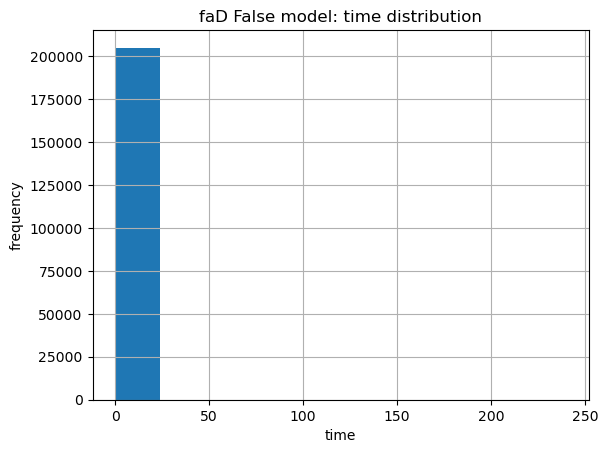

In [167]:
visualizer(name,tf=False)

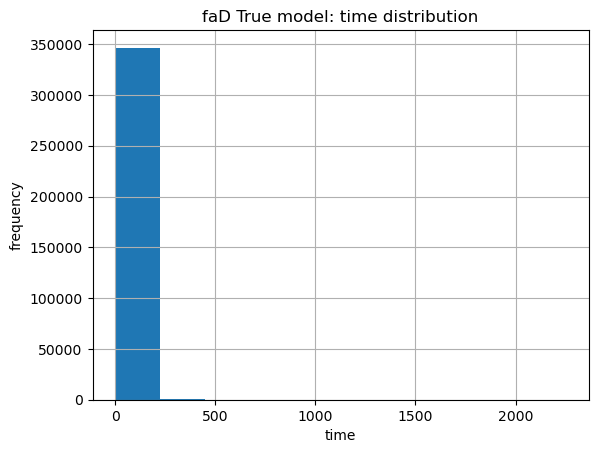

In [168]:
visualizer(name,tf=True)

# Visualization by correlation matrix of computation time

In [169]:
df_TF= df[[f"{name}_TF" for name in constraints_names]]
df_time = df[[f"{name}_time" for name in constraints_names]]

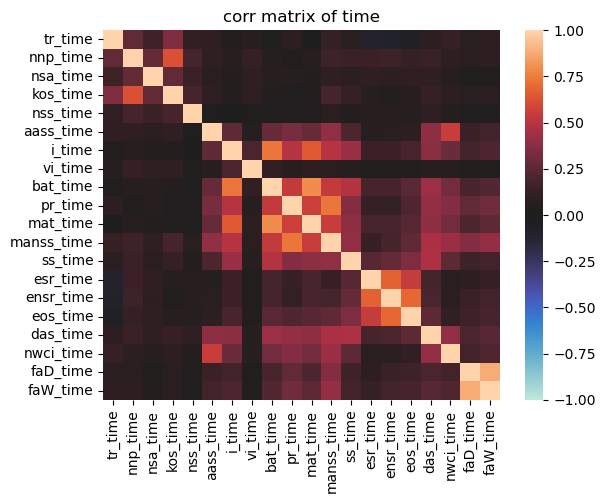

In [170]:
df_time_corr = df_time.corr()

sns.heatmap(df_time_corr,vmax=1,vmin=-1,center=0,annot=False,)
plt.title("corr matrix of time")
plt.plot()
plt.savefig("time_corr.png")
plt.show()

# Find the Cramer's coefficient of associationfor {constraint name}_TF

In [224]:
from scipy.stats import chi2_contingency

def cramersv(col1,col2,bias_correction = False):
    crosstab = np.array(pd.crosstab(col1, col2)).astype(np.float32)
    N = crosstab.sum()
    X,_,_,_ = chi2_contingency(crosstab,correction=False)
    phai = X/N
    
    k,r = crosstab.shape
    assert(k==2 and r==2)
    
    if not bias_correction:
        return np.sqrt(phai /(np.min(np.array([k,r])) - 1))
    
    phai2 = np.max(np.array([0,phai - (k-1) * (r-1) / (N-1)]) )
    k2 = k - (k-1) ** 2 / (N-1)
    r2  = r - (r-1) ** 2 / (N-1)
    
    return np.sqrt(phai2 / (np.min(np.array([k2,r2]))-1) )

print(df_TF.shape)

(552022, 20)


In [172]:
cols = df_TF.columns
cramer_matrix = np.zeros((len(cols),len(cols)))

for i in range(len(cols)):
    for j in range(len(cols)):
        cramer_matrix[i][j] = cramersv(df_TF[cols[i]],df_TF[cols[j]])

df_cramer = pd.DataFrame({cols[i] : cramer_matrix[i]  for i in range(len(cols))},index=cols)
df_cramer

,tr_TF,nnp_TF,nsa_TF,kos_TF,nss_TF,aass_TF,i_TF,vi_TF,bat_TF,pr_TF,mat_TF,manss_TF,ss_TF,esr_TF,ensr_TF,eos_TF,das_TF,nwci_TF,faD_TF,faW_TF
tr_TF,1.00e+00,4.43e-01,3.57e-01,4.84e-01,5.00e-01,4.92e-01,1.16e-01,2.07e-01,1.70e-01,4.45e-01,3.10e-01,2.08e-01,1.88e-01,1.90e-01,3.22e-01,3.13e-01,5.02e-01,5.16e-01,2.82e-01,2.82e-01
nnp_TF,4.43e-01,1.00e+00,1.04e-01,6.63e-01,1.61e-01,1.44e-01,7.62e-02,1.02e-01,1.18e-01,2.95e-01,2.15e-01,9.11e-02,8.90e-02,2.33e-01,3.92e-01,1.84e-01,1.66e-01,1.90e-01,1.23e-01,1.24e-01
nsa_TF,3.57e-01,1.04e-01,1.00e+00,1.59e-01,6.52e-01,6.57e-01,5.71e-02,1.77e-01,7.03e-04,1.58e-01,2.22e-03,1.38e-01,1.41e-01,3.27e-02,1.25e-01,6.52e-02,6.23e-01,5.59e-01,3.36e-01,3.32e-01
kos_TF,4.84e-01,6.63e-01,1.59e-01,1.00e+00,2.47e-01,2.35e-01,7.26e-02,1.54e-01,1.07e-01,3.08e-01,1.97e-01,3.50e-01,1.55e-01,1.22e-01,5.15e-01,3.06e-01,2.58e-01,2.84e-01,2.19e-01,2.18e-01
nss_TF,5.00e-01,1.61e-01,6.52e-01,2.47e-01,1.00e+00,8.21e-01,1.20e-01,2.75e-01,1.58e-02,2.87e-01,2.66e-02,2.86e-01,2.20e-01,4.47e-02,1.95e-01,1.34e-01,7.81e-01,7.63e-01,4.08e-01,4.01e-01
aass_TF,4.92e-01,1.44e-01,6.57e-01,2.35e-01,8.21e-01,1.00e+00,8.21e-02,2.67e-01,7.43e-03,2.56e-01,1.47e-02,2.53e-01,1.94e-01,3.92e-02,1.82e-01,1.22e-01,7.98e-01,7.79e-01,3.76e-01,3.70e-01
i_TF,1.16e-01,7.62e-02,5.71e-02,7.26e-02,1.20e-01,8.21e-02,1.00e+00,3.32e-01,5.41e-02,2.30e-01,9.45e-02,1.91e-01,1.82e-01,3.96e-02,5.68e-02,7.14e-02,1.75e-01,8.75e-02,8.25e-02,8.11e-02
vi_TF,2.07e-01,1.02e-01,1.77e-01,1.54e-01,2.75e-01,2.67e-01,3.32e-01,1.00e+00,4.50e-02,2.29e-01,5.59e-02,3.03e-01,2.89e-01,6.03e-02,1.32e-01,1.31e-01,2.88e-01,2.60e-01,1.83e-01,1.80e-01
bat_TF,1.70e-01,1.18e-01,7.03e-04,1.07e-01,1.58e-02,7.43e-03,5.41e-02,4.50e-02,1.00e+00,1.46e-01,5.26e-01,2.61e-02,7.77e-02,9.96e-02,1.01e-01,1.37e-01,3.79e-02,2.44e-02,2.50e-02,2.69e-02
pr_TF,4.45e-01,2.95e-01,1.58e-01,3.08e-01,2.87e-01,2.56e-01,2.30e-01,2.29e-01,1.46e-01,1.00e+00,2.55e-01,3.87e-01,2.03e-01,1.34e-01,2.44e-01,2.66e-01,3.13e-01,3.20e-01,2.23e-01,2.21e-01


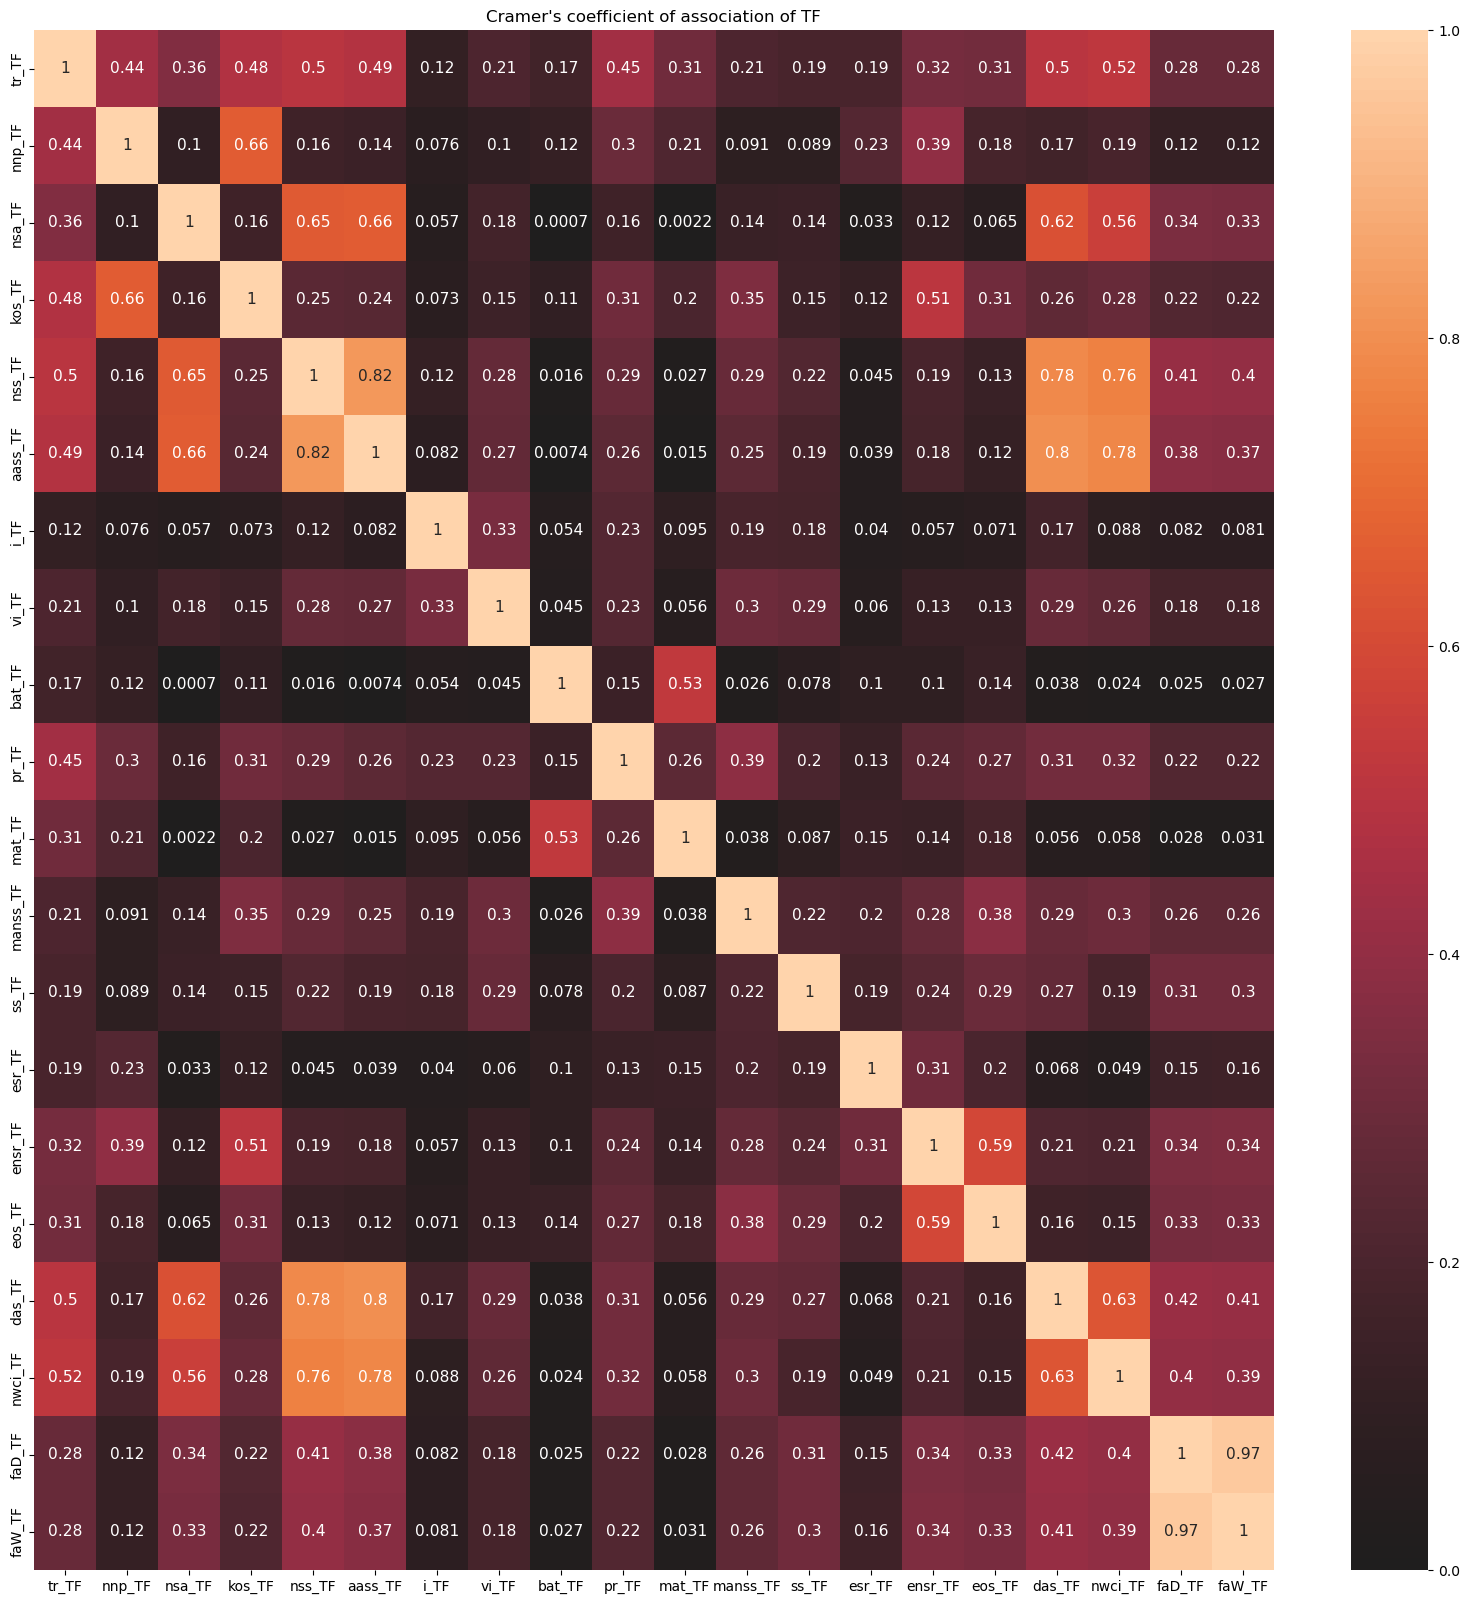

In [218]:
sns.heatmap(df_cramer,vmax=1,vmin=0,center=0,annot=True,annot_kws={"size": 50 / np.sqrt(len(df_TF.corr()))},)
plt.rcParams["figure.figsize"] = (20,20)
plt.title("Cramer's coefficient of association of TF")
plt.plot()
plt.savefig("tf_cramer.png")
plt.show()

In [175]:
cols = df_TF.columns
cramer_matrix_corrected =  np.zeros((len(cols),len(cols)))

for i in range(len(cols)):
    for j in range(len(cols)):
        cramer_matrix_corrected[i][j] = cramersv(df_TF[cols[i]],df_TF[cols[j]],bias_correction=True)

df_cramer_corrected = pd.DataFrame({cols[i] : cramer_matrix_corrected[i]  for i in range(len(cols))},index=cols)
df_cramer_corrected

,tr_TF,nnp_TF,nsa_TF,kos_TF,nss_TF,aass_TF,i_TF,vi_TF,bat_TF,pr_TF,mat_TF,manss_TF,ss_TF,esr_TF,ensr_TF,eos_TF,das_TF,nwci_TF,faD_TF,faW_TF
tr_TF,1.00e+00,4.43e-01,3.57e-01,4.84e-01,5.00e-01,4.92e-01,1.16e-01,2.07e-01,1.70e-01,4.45e-01,3.10e-01,2.08e-01,1.88e-01,1.90e-01,3.22e-01,3.13e-01,5.02e-01,5.16e-01,2.82e-01,2.82e-01
nnp_TF,4.43e-01,1.00e+00,1.04e-01,6.63e-01,1.61e-01,1.44e-01,7.61e-02,1.02e-01,1.18e-01,2.95e-01,2.15e-01,9.11e-02,8.90e-02,2.33e-01,3.92e-01,1.84e-01,1.66e-01,1.90e-01,1.23e-01,1.24e-01
nsa_TF,3.57e-01,1.04e-01,1.00e+00,1.59e-01,6.52e-01,6.57e-01,5.71e-02,1.77e-01,0.00e+00,1.58e-01,1.76e-03,1.38e-01,1.41e-01,3.26e-02,1.25e-01,6.51e-02,6.23e-01,5.59e-01,3.36e-01,3.32e-01
kos_TF,4.84e-01,6.63e-01,1.59e-01,1.00e+00,2.47e-01,2.35e-01,7.26e-02,1.54e-01,1.07e-01,3.08e-01,1.97e-01,3.50e-01,1.55e-01,1.22e-01,5.15e-01,3.06e-01,2.58e-01,2.84e-01,2.19e-01,2.18e-01
nss_TF,5.00e-01,1.61e-01,6.52e-01,2.47e-01,1.00e+00,8.21e-01,1.20e-01,2.75e-01,1.57e-02,2.87e-01,2.65e-02,2.86e-01,2.20e-01,4.47e-02,1.95e-01,1.34e-01,7.81e-01,7.63e-01,4.08e-01,4.01e-01
aass_TF,4.92e-01,1.44e-01,6.57e-01,2.35e-01,8.21e-01,1.00e+00,8.21e-02,2.67e-01,7.30e-03,2.56e-01,1.46e-02,2.53e-01,1.94e-01,3.92e-02,1.82e-01,1.22e-01,7.98e-01,7.79e-01,3.76e-01,3.70e-01
i_TF,1.16e-01,7.61e-02,5.71e-02,7.26e-02,1.20e-01,8.21e-02,1.00e+00,3.32e-01,5.40e-02,2.30e-01,9.45e-02,1.91e-01,1.82e-01,3.96e-02,5.68e-02,7.14e-02,1.75e-01,8.75e-02,8.24e-02,8.11e-02
vi_TF,2.07e-01,1.02e-01,1.77e-01,1.54e-01,2.75e-01,2.67e-01,3.32e-01,1.00e+00,4.50e-02,2.29e-01,5.59e-02,3.03e-01,2.89e-01,6.03e-02,1.32e-01,1.31e-01,2.88e-01,2.60e-01,1.83e-01,1.80e-01
bat_TF,1.70e-01,1.18e-01,0.00e+00,1.07e-01,1.57e-02,7.30e-03,5.40e-02,4.50e-02,1.00e+00,1.46e-01,5.26e-01,2.61e-02,7.77e-02,9.96e-02,1.01e-01,1.37e-01,3.79e-02,2.44e-02,2.50e-02,2.69e-02
pr_TF,4.45e-01,2.95e-01,1.58e-01,3.08e-01,2.87e-01,2.56e-01,2.30e-01,2.29e-01,1.46e-01,1.00e+00,2.55e-01,3.87e-01,2.03e-01,1.34e-01,2.44e-01,2.66e-01,3.13e-01,3.20e-01,2.23e-01,2.21e-01


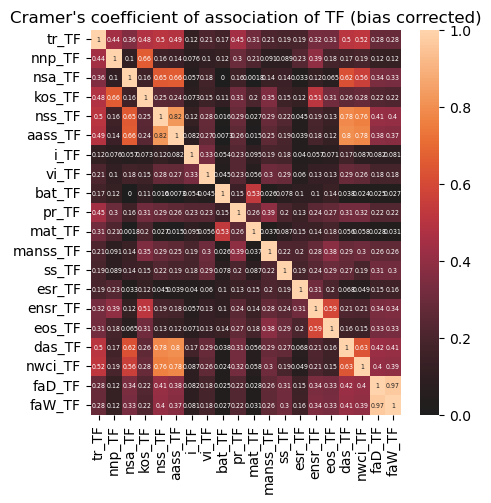

In [211]:
sns.heatmap(df_cramer_corrected,vmax=1,vmin=0,center=0,annot=True,annot_kws={"size": 20 / np.sqrt(len(df_TF.corr()))},)
plt.rcParams["figure.figsize"] = (5,5)
plt.title("Cramer's coefficient of association of TF (bias corrected)")
plt.plot()
plt.savefig("tf_cramer.png")
plt.show()

In [178]:
# cross tabulation
col1 = "esr_TF"
col2 = "manss_TF"
pd.crosstab(df_TF[col1],df_TF[col2])

manss_TF,0,1
esr_TF,,
0,72987,44924
1,357883,76228


(552022, 20)
            tr_TF   nnp_TF    nsa_TF   kos_TF   nss_TF  aass_TF     i_TF  \
tr_TF    1.00e+00 4.43e-01  3.57e-01 4.84e-01 5.00e-01 4.92e-01 1.16e-01   
nnp_TF   4.43e-01 1.00e+00  1.04e-01 6.63e-01 1.61e-01 1.44e-01 7.62e-02   
nsa_TF   3.57e-01 1.04e-01  1.00e+00 1.59e-01 6.52e-01 6.57e-01 5.71e-02   
kos_TF   4.84e-01 6.63e-01  1.59e-01 1.00e+00 2.47e-01 2.35e-01 7.26e-02   
nss_TF   5.00e-01 1.61e-01  6.52e-01 2.47e-01 1.00e+00 8.21e-01 1.20e-01   
aass_TF  4.92e-01 1.44e-01  6.57e-01 2.35e-01 8.21e-01 1.00e+00 8.21e-02   
i_TF     1.16e-01 7.62e-02  5.71e-02 7.26e-02 1.20e-01 8.21e-02 1.00e+00   
vi_TF    2.07e-01 1.02e-01  1.77e-01 1.54e-01 2.75e-01 2.67e-01 3.32e-01   
bat_TF   1.70e-01 1.18e-01  7.03e-04 1.07e-01 1.58e-02 7.43e-03 5.41e-02   
pr_TF    4.45e-01 2.95e-01  1.58e-01 3.08e-01 2.87e-01 2.56e-01 2.30e-01   
mat_TF   3.10e-01 2.15e-01 -2.22e-03 1.97e-01 2.66e-02 1.47e-02 9.45e-02   
manss_TF 2.08e-01 9.11e-02  1.38e-01 3.50e-01 2.86e-01 2.53e-01 1.91e-01   

<AxesSubplot:>

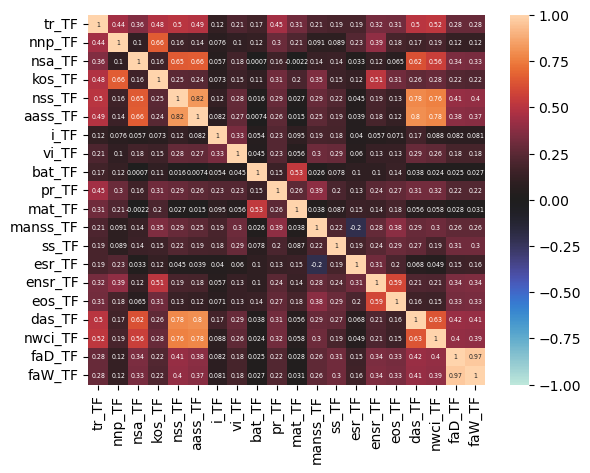

In [197]:
#ファイ係数
print(df_TF.shape)
print(df_TF.corr())
sns.heatmap(df_TF.corr(),vmax=1,vmin=-1,center=0,annot=True,annot_kws={"size": 20 / np.sqrt(len(df_TF.corr()))},)

# Turn a dataframe into an image

In [ ]:
def df2image(df_saved,name = "output.png"):
    import dataframe_image as dfi
    print("saving")
    dfi.export(df_saved,name,max_cols = -1)
    return

# Find out the computation time for the data computed by subPC.
(The difference in PC specs is taken into account.)

In [ ]:
def group_by_describe(col_name ,df):
    df2image(df[[c + "_time" for c in constraints_names] + [col_name]].groupby(col_name).describe(),f"group_by_{col_name}.png")
    return

#  time consuming
# for col in model_info:
#     if col == "num_edges": continue
#     print(col,"start")
#     group_by_describe(col,df)


df_sub = pd.read_csv("./time_data_subPC.csv")
print(df_sub.shape)

for name in constraints_names:
    df[f"{name}_TF"] = df[f"{name}_TF"] * 1

df_sub = df_sub[df_sub["Themes_size"] < 4]
df_sub = df_sub[df_sub["num_nodes"] % 3 == 0]

print(df_sub.shape)
df_sub.describe()

In [ ]:
def describe_projection_by_constraints(df,constraints):
    df_reduced = df.copy()
    for c in ["count","%","std","min"]:
        for col in df_reduced.columns:
            if c in col[1] or (col[0][0:col[0].find("_")] ) not in constraints:
                df_reduced = df_reduced.drop(col,axis=1)
    return df_reduced

In [ ]:
pd.options.display.float_format = '{:.2e}'.format

constraints = [
    
#     'tr', 
#     'nnp',
#     'nsa', 
#     'kos',
#     'nss',
    
#     'aass',
#     'i',
#     'vi',
#     'bat',
#     'pr',
#     'mat',
#     'manss',
#     'ss',
    
    'esr',
    'ensr',
    'eos',
    'das',
    'nwci',
    'faD',
    'faW',
]
    

def groupby_describe_TF(df,group=["Themes_size"]):
    describe_tab_TF = df[[c + "_time" for c in constraints_names] + group].groupby(group).describe()
    return describe_tab_TF

 
describe_tab_TF = groupby_describe_TF(df_sub,["num_nodes","Themes_size","num_propvar"])

projected = describe_projection_by_constraints(describe_tab_TF,constraints)
tex = projected.to_latex()

print(tex)

projected

# Classify data by TF for each constraint and then tabulate computation time.

In [ ]:
def groupby_describe_T(df,group=["Themes_size","num_propvar"]):
    describe_tab_T = df[[c + "_time" for c in constraints_names] + group].groupby(group).describe()
    
    drop_col = ["count","min","std","25%","50%","75%"]
    
    for col in describe_tab_T.columns:
        if col[1] in drop_col:
            describe_tab_T = describe_tab_T.drop(col,axis=1)
    

    for col in describe_tab_T.columns:
        print(col)
        name = col[0][:col[0].find("_")]
        kind = col[1]
        print(name)
        for row in describe_tab_T.index:
            

            if len(group) > 1:
                row = tuple(row)
            
            df_limited = df[df[name + "_TF"] > 0.5].copy()
            
            for i in range(len(group)):
                if len(group) == 1:
                    df_limited = df_limited[df_limited[group[i]]== row]
                else:
                    df_limited = df_limited[df_limited[group[i]]== row[i]]

            df_limited = df_limited.describe()
            describe_tab_T.loc[row,col] = df_limited.loc[kind,name + "_time"]

    return describe_tab_T
    
print(df_sub.shape)
describe_tab_T = groupby_describe_T(df_sub,["num_nodes","Themes_size","num_propvar"])

# describe_tab_T = describe_tab.copy()

# print(describe_tab_T.index)

# for col in describe_tab_T.columns:
#     print(col)
#     name = col[0][:col[0].find("_")]
#     kind = col[1]
#     print(name)
#     for row in describe_tab_T.index:
# #         print(row)
        
#         df_limited = df_sub[df_sub[name + "_TF"] > 0.5]
#         df_limited = df_limited[df_limited["Themes_size"] == row]
        
#         df_limited = df_limited.describe()
        
# #         print(df_limited)
        
#         describe_tab_T.loc[row,col] = df_limited.loc[kind,name + "_time"]
    
# describe_tab_T

In [ ]:
pd.options.display.float_format = '{:.2e}'.format

constraints = [
    
#     'tr', 
#     'nnp',
#     'nsa', 
#     'kos',
#     'nss',
    
#     'aass',
#     'i',
#     'vi',
#     'bat',
#     'pr',
#     'mat',
#     'manss',
#     'ss',
    
    'esr',
    'ensr',
    'eos',
    'das',
    'nwci',
    'faD',
    'faW',
]

describe_tab_Treduced = describe_projection_by_constraints(describe_tab_T,constraints)
s = describe_tab_Treduced.to_latex()

print(s)
describe_tab_Treduced

In [ ]:
def groupby_describe_F(df,group=["Themes_size","num_propvar"]):
    describe_tab_F = df[[c + "_time" for c in constraints_names] + group].groupby(group).describe()
    
    drop_col = ["count","min","std","25%","50%","75%"]
    
    for col in describe_tab_F.columns:
        if col[1] in drop_col:
            describe_tab_F = describe_tab_F.drop(col,axis=1)
    

    for col in describe_tab_F.columns:
        print(col)
        name = col[0][:col[0].find("_")]
        kind = col[1]
        print(name)
        for row in describe_tab_F.index:
            

            if len(group) > 1:
                row = tuple(row)
            
            df_limited = df[df[name + "_TF"] < 0.5].copy()
            
            for i in range(len(group)):
                if len(group) == 1:
                    df_limited = df_limited[df_limited[group[i]]== row]
                else:
                    df_limited = df_limited[df_limited[group[i]]== row[i]]

            df_limited = df_limited.describe()
            describe_tab_F.loc[row,col] = df_limited.loc[kind,name + "_time"]

    return describe_tab_F
    
print(df_sub.shape)
describe_tab_F = groupby_describe_F(df_sub,["num_nodes","Themes_size","num_propvar"])


# describe_tab_F = describe_tab.copy()

# print(describe_tab_F.index)

# for col in describe_tab_F.columns:
#     print(col)
#     name = col[0][:col[0].find("_")]
#     kind = col[1]
#     print(name)
#     for row in describe_tab_F.index:
# #         print(row)
        
#         df_limited = df_sub[df_sub[name + "_TF"] < 0.5]
#         df_limited = df_limited[df_limited["Themes_size"] == row]
        
#         df_limited = df_limited.describe()
        
# #         print(df_limited)
        
#         describe_tab_F.loc[row,col] = df_limited.loc[kind,name + "_time"]
    
# describe_tab_F

In [ ]:
pd.options.display.float_format = '{:.2e}'.format

cols = [
    
#     'tr', 
#     'nnp',
#     'nsa', 
#     'kos',
#     'nss',
    
#     'aass',
#     'i',
#     'vi',
#     'bat',
#     'pr',
#     'mat',
#     'manss',
#     'ss',
    
    'esr',
    'ensr',
    'eos',
    'das',
    'nwci',
    'faD',
    'faW',
]

describe_tab_Freduced =  describe_projection_by_constraints(describe_tab_F,constraints)
s = describe_tab_Freduced.to_latex()

print(s)
describe_tab_Freduced

In [ ]:
df_sub.shape

# Checking for the establishment of the theorem on the satisfaction of constraints

In [ ]:
import numpy as np

In [ ]:
# constraints_names = [
#        'tr', 
#     'nnp',
#        'nsa', 
#     'kos',
#     'nss',
#     'aass',
#     'i',
#     'vi',
#        'bat',
#     'pr',
#     'mat',
#        'manss',
#     'ss',
#     'esr',
#        'ensr',
#     'eos',
#     'das',
#     'nwci',
#     'faD',
#     'faW',
# ]

antecedent = [
    'aass',
    'i',
    'vi',
    'bat',
    'pr',
    'mat',
    'manss',
    'ss',
]

consequent =  [
    'tr', 
    'nnp',
    'nsa', 
    'kos',
    'nss',
    
    "faW",
    "faD",
    "esr",
    "eos",
]

consequent = constraints_names


In [ ]:
df_meet_antecedent = df[df["Aord_size"]  > 0].copy()

for c in antecedent:
    print(c)
    df_meet_antecedent = df_meet_antecedent[df_meet_antecedent[f"{c}_TF"] > 0.5].copy()
    print(df_meet_antecedent.shape)

print("checked antecedent")
print("shape:",df_meet_antecedent.shape)

df_meet_consequent = df_meet_antecedent.copy()
    
for c in consequent:
    print(c)
    df_meet_consequent = df_meet_consequent[df_meet_consequent[f"{c}_TF"] > 0.5].copy()
    print(df_meet_consequent.shape)

print("shape:",df_meet_consequent.shape)

assert(df_meet_consequent.shape == df_meet_antecedent.shape)


In [ ]:
df_meet_antecedent.describe()

In [ ]:
df_meet_antecedent[df_meet_antecedent["num_propvar"] == 0]

In [ ]:
df_counter_example = df_meet_antecedent[df_meet_antecedent["nnp_TF"] < 0.5]

In [ ]:
df_counter_example